In [1]:
data_path = "data/train.csv"

In [9]:
import pandas as pd


df = pd.read_csv(data_path, index_col="id")

In [10]:
df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
id,,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [6]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257587,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


In [7]:
df.isna().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(0)

In [12]:
corr = df.corr()

In [21]:
corr[corr.abs() > 0.5].dropna(how="any", axis=0)

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute


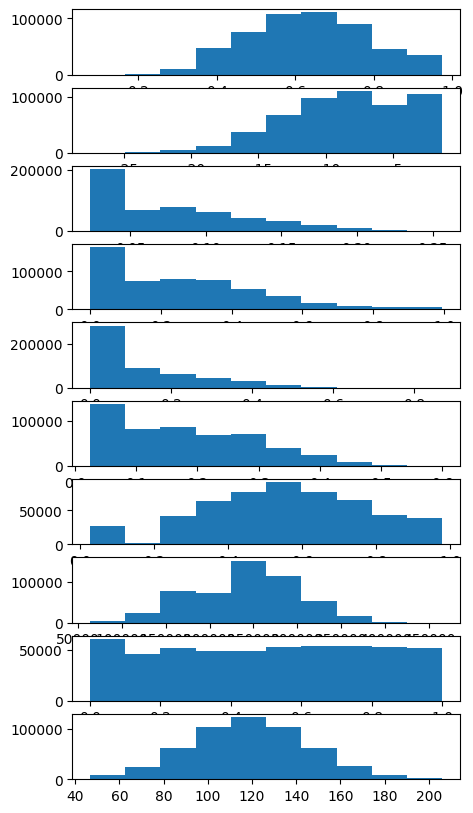

In [34]:
import matplotlib.pyplot as plt

n_cols = len(df.columns)

fig, axes = plt.subplots(n_cols, 1, figsize=(5, 10))

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col])

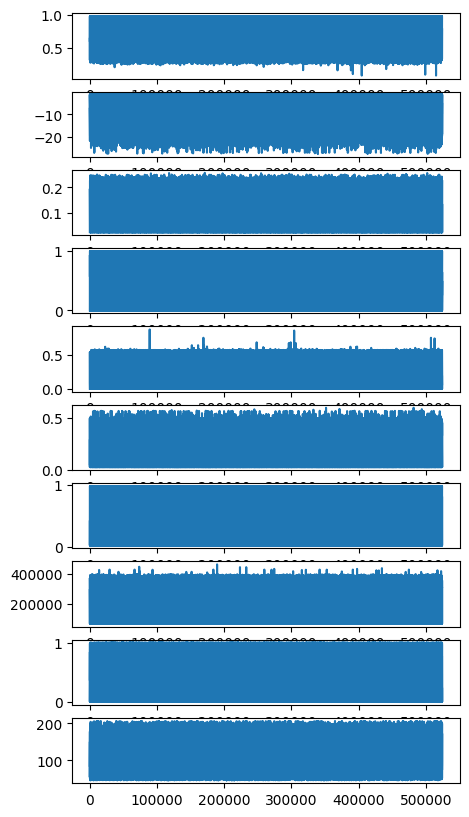

In [37]:
fig, axes = plt.subplots(n_cols, 1, figsize=(5, 10))

for idx, col in enumerate(df.columns):
    axes[idx].plot(df[col])

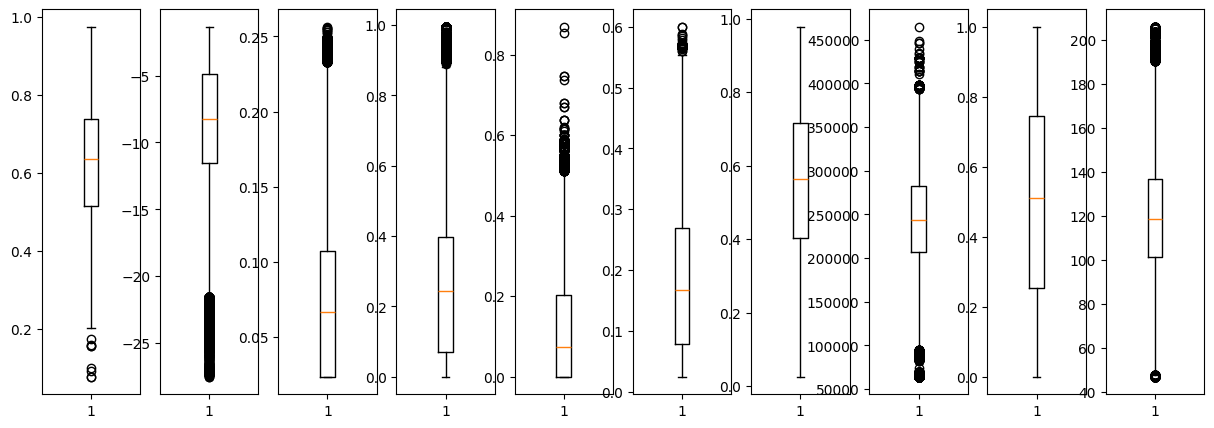

In [41]:
fig, axes = plt.subplots(1, n_cols, figsize=(15, 5))

for idx, col in enumerate(df.columns):
    axes[idx].boxplot(df[col])

In [43]:
# https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.18632034 0.16075334 1.02011356 ... 0.82276748 1.12206188 1.07659229]
 [0.04211636 1.70888505 0.05854084 ... 1.30437691 1.22614282 0.64699626]
 [0.75402221 1.64085896 0.72632462 ... 1.13622201 0.4267744  2.40724211]
 ...
 [0.57288565 1.52116217 0.06114404 ... 1.73538741 0.75142583 1.06830867]
 [0.02771663 0.20962699 0.77380516 ... 1.36206526 1.52902578 0.81598187]
 [0.91569341 0.62712024 1.02011356 ... 1.21305503 0.9552934  1.57077292]]


In [52]:
import numpy as np

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (524164, 10)
DataFrame Shape after Removing Outliers: (357528, 10)


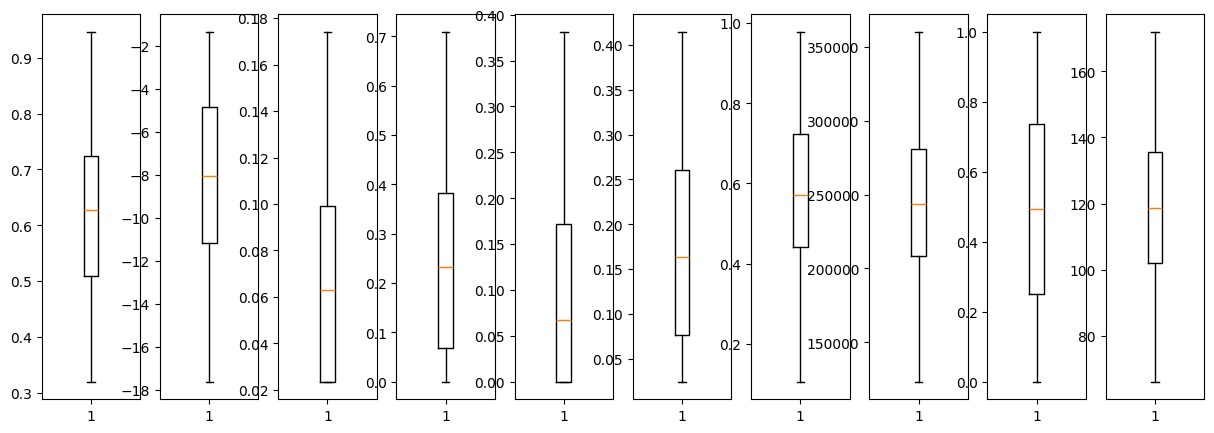

In [53]:
fig, axes = plt.subplots(1, n_cols, figsize=(15, 5))

for idx, col in enumerate(no_outliers.columns):
    axes[idx].boxplot(no_outliers[col])

In [54]:
no_outliers.to_csv("data/preprocessed_train.csv")